In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [200]:
df = pd. read_pickle('../input/dataset/Dataset.pkl') 

In [201]:
df

{'LabAnalysis':     %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
 0   43836     5.3     4.3     1.10   15.2     0.3     9.6     4.9   0.090   
 1   43850     5.2     4.0     1.10   11.3     0.3     9.8     4.1   0.090   
 2   43864     4.8     3.9     1.30   11.6     0.3    10.2     3.5   0.090   
 3   43879     4.8     3.7     1.40   13.3     0.4     8.2     2.8   0.090   
 4   43893     4.7     3.5     1.10   11.3     0.4     7.6     2.5   0.010   
 5   43908     5.4     3.4     1.30   13.4     0.3     6.5     1.9   0.009   
 6   43921     5.6     3.1     1.20   11.0     0.2     5.6     2.0   0.009   
 7   43936     5.7     2.9     1.20    9.3     0.3     6.4     2.7   0.009   
 8   43951     6.0     3.6     0.80   13.6     0.3     8.3     3.2   0.010   
 9   43963     5.7     3.0     0.80    9.1     0.2     6.2     2.1   0.010   
 10  43836     4.3     5.1     1.10   15.1     0.3     9.7     5.0   0.090   
 11  43850     5.6     4.0     0.50   17.1     0.

In [202]:
with open('../input/dataset/Dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [203]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

#Exploratory Data Analysis on Resources Dataset

In [204]:
res_df=data['Resources']
res_df.shape

(996, 12)

In [205]:
res_df.head(10)

,%Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,43815,2.71,1.1,0.0,0.007,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,43816,0.92,1.0,0.0,0.009,0.00,0.00,NaN,NaN,NaN,NaN,NaN
2,43817,0.97,1.0,0.7,0.014,0.00,0.00,NaN,NaN,NaN,NaN,NaN
3,43818,0.10,0.9,0.5,0.025,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,43819,2.24,0.8,0.5,0.017,0.76,0.00,NaN,NaN,NaN,NaN,NaN
5,43820,3.38,0.8,0.6,0.007,0.52,0.00,NaN,NaN,NaN,NaN,NaN
6,43821,3.24,0.8,0.6,0.008,0.52,0.00,NaN,NaN,NaN,NaN,NaN
7,43822,3.00,0.8,0.6,0.010,0.24,6.11,NaN,NaN,NaN,NaN,NaN
8,43823,2.67,1.0,0.6,0.012,1.08,0.19,NaN,NaN,NaN,NaN,NaN
9,43824,2.72,1.0,0.6,0.012,4.32,0.19,NaN,NaN,NaN,NaN,NaN


In [206]:
res_df.rename(columns = {'%Time ':'Time'}, inplace = True)
   

In [207]:
res_df["Time"]= pd.to_datetime(res_df["Time"])

In [208]:
res_df["Time"]= pd.to_datetime(res_df["Time"])

In [209]:
res_df.info

<bound method DataFrame.info of                              Time  Heat_cons  ElecHigh  ElecLow  CO2_cons  \
0   1970-01-01 00:00:00.000043815     2.7100       1.1      0.0  0.007000   
1   1970-01-01 00:00:00.000043816     0.9200       1.0      0.0  0.009000   
2   1970-01-01 00:00:00.000043817     0.9700       1.0      0.7  0.014000   
3   1970-01-01 00:00:00.000043818     0.1000       0.9      0.5  0.025000   
4   1970-01-01 00:00:00.000043819     2.2400       0.8      0.5  0.017000   
..                            ...        ...       ...      ...       ...   
991 1970-01-01 00:00:00.000043976     0.2694       0.0      0.0  0.029262   
992 1970-01-01 00:00:00.000043977     0.3150       0.0      0.0  0.023700   
993 1970-01-01 00:00:00.000043978     0.2616       0.0      0.0  0.029766   
994 1970-01-01 00:00:00.000043979     0.4665       0.0      0.0  0.030178   
995 1970-01-01 00:00:00.000043980     0.4515       0.0      0.0  0.034931   

      Irr  Drain  Unnamed: 7  Unnamed: 8  U

In [210]:
res_df.describe()

,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,0.0,0.0,0.0,0.0,0.0
mean,1.786728,1.013647,0.606728,0.057534,4.479747,1.639146,NaN,NaN,NaN,NaN,NaN
std,1.162702,0.659289,0.377083,0.025882,2.947087,1.296136,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.003647,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.781200,0.357500,0.250250,0.039971,2.860000,0.600000,NaN,NaN,NaN,NaN,NaN
50%,1.516800,1.300000,0.786500,0.054870,4.160800,1.305000,NaN,NaN,NaN,NaN,NaN
75%,2.622075,1.500000,0.900000,0.073042,5.980575,2.480000,NaN,NaN,NaN,NaN,NaN
max,5.960000,2.216500,1.144000,0.160000,60.201327,6.110000,NaN,NaN,NaN,NaN,NaN


In [211]:
res_df.columns

Index(['Time', 'Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr', 'Drain',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [212]:
res_df=res_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'], axis=1)

In [213]:
res_df.columns

Index(['Time', 'Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr', 'Drain'], dtype='object')

In [214]:
res_df.dtypes

Time         datetime64[ns]
Heat_cons           float64
ElecHigh            float64
ElecLow             float64
CO2_cons            float64
Irr                 float64
Drain               float64
dtype: object

In [215]:
res=list(res_df.columns.values)
res.remove('Time')

In [216]:
res_df.nunique()

Time         166
Heat_cons    860
ElecHigh     193
ElecLow      153
CO2_cons     910
Irr          203
Drain        329
dtype: int64

In [217]:
res_df.duplicated().sum()

0

In [218]:
res_df.isnull().sum()

Time         0
Heat_cons    0
ElecHigh     0
ElecLow      0
CO2_cons     0
Irr          0
Drain        0
dtype: int64

In [219]:
corelation=res_df.corr()
corelation

,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
Heat_cons,1.000000,0.375277,0.266171,-0.184457,-0.164997,-0.111468
ElecHigh,0.375277,1.000000,0.637080,-0.039992,-0.420102,-0.428703
ElecLow,0.266171,0.637080,1.000000,0.217998,-0.187327,-0.171144
CO2_cons,-0.184457,-0.039992,0.217998,1.000000,0.318287,0.309660
Irr,-0.164997,-0.420102,-0.187327,0.318287,1.000000,0.642428
Drain,-0.111468,-0.428703,-0.171144,0.309660,0.642428,1.000000


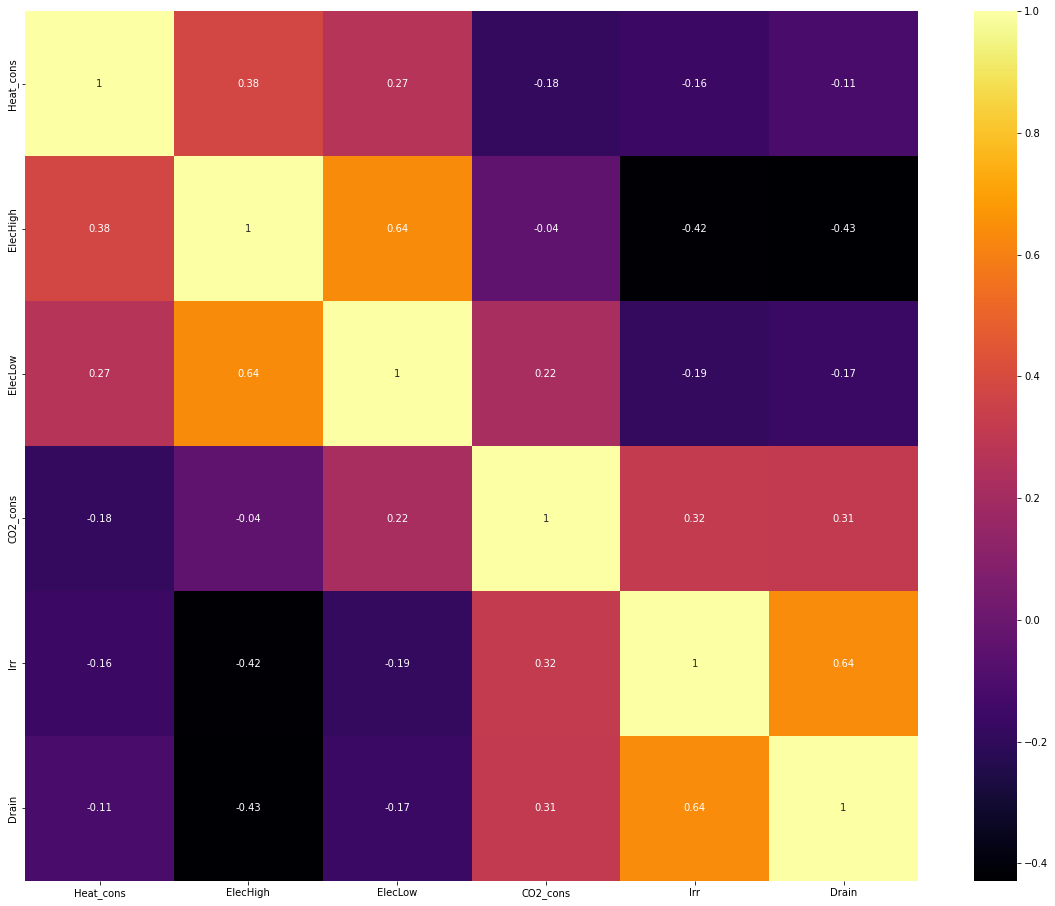

In [220]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,cmap='inferno')
plt.show()

<Figure size 720x432 with 0 Axes>

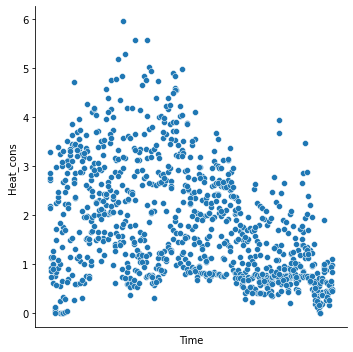

<Figure size 720x432 with 0 Axes>

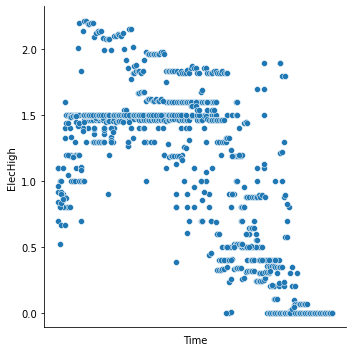

<Figure size 720x432 with 0 Axes>

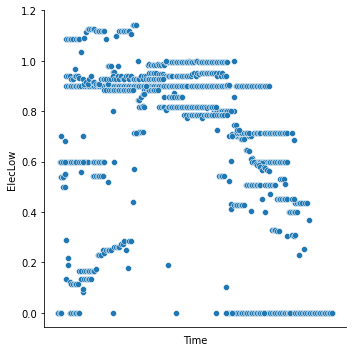

<Figure size 720x432 with 0 Axes>

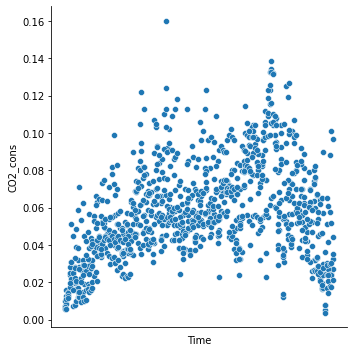

<Figure size 720x432 with 0 Axes>

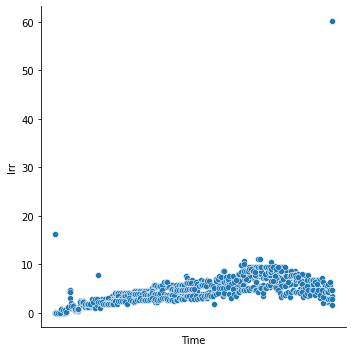

<Figure size 720x432 with 0 Axes>

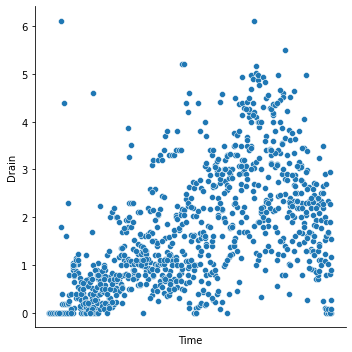

In [221]:
for i in res:
    plt.figure(figsize=(10,6))
    sns.relplot(x='Time',y=i,data=res_df)

<Figure size 720x432 with 0 Axes>

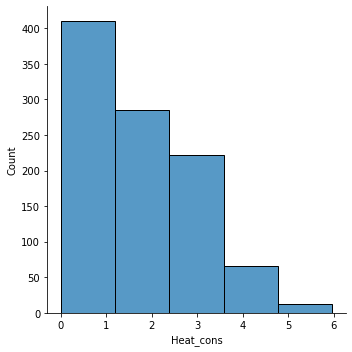

<Figure size 720x432 with 0 Axes>

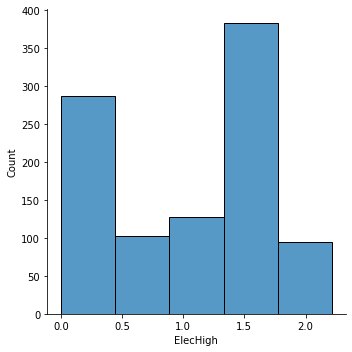

<Figure size 720x432 with 0 Axes>

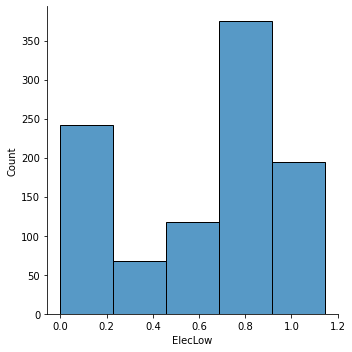

<Figure size 720x432 with 0 Axes>

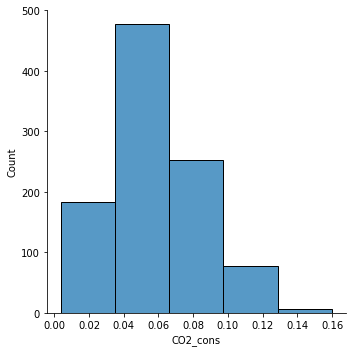

<Figure size 720x432 with 0 Axes>

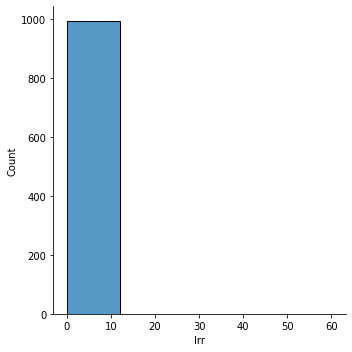

<Figure size 720x432 with 0 Axes>

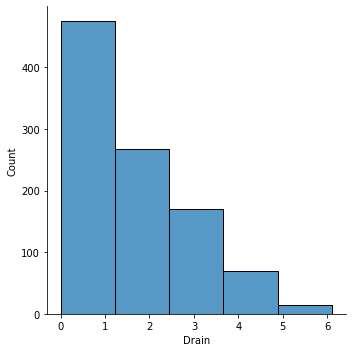

In [222]:
for i in res:
    plt.figure(figsize=(10,6))
    sns.displot(res_df[i],bins=5)